In [ ]:
import zipfile
file=zipfile.ZipFile('emails.csv.zip')
file.extractall()

In [1]:
import pandas  as pd
df=pd.read_csv('emails.csv')

In [2]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [3]:
df["message"][0].split("\n") 

['Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>',
 'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: tim.belden@enron.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Tim Belden <Tim Belden/Enron@EnronXGate>',
 'X-cc: ',
 'X-bcc: ',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Here is our forecast',
 '',
 ' ']

In [2]:
import re
def create_dataframe(series):
    data = []
    #for line in series.split('\n'):
        #data.append(dict(re.findall(r"(Message-ID|Date|From|To|Subject|Mime-Version|Content-Type|Content-Transfer-Encoding|X-From|X-To|X-cc|X-bcc|X-Folder|X-Origin|X-FileName)\s*:\s*([^\s]+)", line)))
        #data1={k:v for element in data for k,v in element.items()}
    data1={}
    data1['text']=' '.join(series.split('\n')[15:]).strip()
    return data1

In [3]:
df1 = df['message'].map(create_dataframe)
df_splited = pd.DataFrame.from_records(df1).fillna("")

In [6]:
print(df_splited.shape)

(517401, 1)


In [4]:
df_splited=df_splited['text'].drop_duplicates()

In [5]:
df_splited.shape

(313411,)

In [16]:
df_splited=pd.DataFrame(df_splited)
for i in range(100):
    print(df_splited.iloc[i])
#df_splited.head(100)

text    Here is our forecast
Name: 0, dtype: object
text    Traveling to have a business meeting takes the...
Name: 1, dtype: object
text    test successful.  way to go!!!
Name: 2, dtype: object
text    Randy,   Can you send me a schedule of the sal...
Name: 3, dtype: object
text    Let's shoot for Tuesday at 11:45.
Name: 4, dtype: object
text    Greg,   How about either next Tuesday or Thurs...
Name: 5, dtype: object
text    Please cc the following distribution list with...
Name: 6, dtype: object
text    any morning between 10 and 11:30
Name: 7, dtype: object
text    1. login:  pallen pw: ke9davis   I don't think...
Name: 8, dtype: object
text    ---------------------- Forwarded by Phillip K ...
Name: 9, dtype: object
text    Mr. Buckner,   For delivered gas behind San Di...
Name: 10, dtype: object
text    Lucy,   Here are the rentrolls:     Open them ...
Name: 11, dtype: object
text    ---------------------- Forwarded by Phillip K ...
Name: 12, dtype: object
text    -----------------

In [6]:
import numpy as np
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
tag=0
emo=0
def tokenizer(text):
    global tag,emo
    #text = re.sub('<[^>]*>', '', text)
    #if re.findall('<[^>]*>', text):
        #tag += 1
    #emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    #if emoticons:
        #emo += 1
    text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

<>:15: SyntaxWarning: invalid escape sequence '\W'
<>:15: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Shabnam\AppData\Local\Temp\ipykernel_52\2041294426.py:15: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')


In [10]:
df_tokenized = df_splited.map(tokenizer)
#print(tag, ' ', emo)

: 

In [2]:
df_tokenized.head()

NameError: name 'df_tokenized' is not defined

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
np.set_printoptions(precision=2)
x_train = tfidf.fit_transform(count.fit_transform(df_tokenized)).toarray()
print(x_train)

: 

In [8]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', n_features=2**21, preprocessor=None, tokenizer=None)
X_train = vect.transform(df_splited)

In [9]:
import numpy as np
from sklearn.decomposition import TruncatedSVD 

model = TruncatedSVD(n_components=2, random_state=42)
X_train_r=model.fit_transform(X_train) 

In [ ]:
X_train=X_train.drop_duplicates()

In [10]:
X_train.shape

(313411, 2097152)

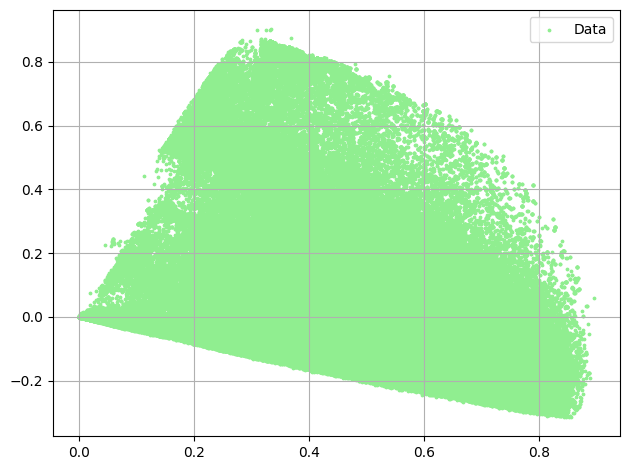

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], s=3, c='lightgreen', label='Data')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=1).fit(X_train)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")

Number of elements assigned to each cluster: [255946  57465]


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=1).fit(X_train_r)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")

Number of elements assigned to each cluster: [251862  61549]


In [26]:
print(cluster_ids)

[0 1]


In [24]:
y=KMeans.predict(kmeans, X_train_r)
kmeans.cluster_centers_.shape

(2, 2)

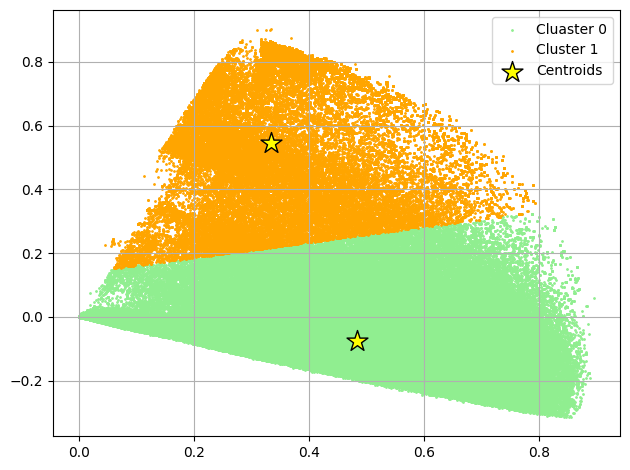

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_train_r[y == 0, 0], X_train_r[y == 0, 1], s=1, c='lightgreen', label='Cluster '+str(cluster_ids[0]))
plt.scatter(X_train_r[y == 1, 0], X_train_r[y == 1, 1], s=1, c='orange', label='Cluster '+str(cluster_ids[1]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X_train_r,kmeans.labels_, metric='euclidean', sample_size=50000 )
print(score)

0.5555602384034785
